In [86]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = "/content/clean_data.xlsx"  # Update this path
df = pd.read_excel(file_path)

# Display basic information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   JUMLAH PENDUDUK            31 non-null     float64
 1   LUAS WILAYAH (KM)          31 non-null     float64
 2   JUMLAH RUMAH               31 non-null     float64
 3   JENIS RUMAH  TEMBOK        31 non-null     float64
 4   JUMLAH SEKOLAH
(SMP-SMA)   31 non-null     float64
 5   JUMLAH RS                  31 non-null     float64
 6   Usia 15-64 (%)             31 non-null     float64
 7   Kompetitor indihome/lokal  31 non-null     float64
 8   Unnamed: 8                 31 non-null     float64
dtypes: float64(9)
memory usage: 2.4 KB


,JUMLAH PENDUDUK,LUAS WILAYAH (KM),JUMLAH RUMAH,JENIS RUMAH TEMBOK,JUMLAH SEKOLAH\n(SMP-SMA),JUMLAH RS,Usia 15-64 (%),Kompetitor indihome/lokal,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,89863.0,48.466,20892.0,16914.1632,24.0,0.0,61466.292,1.0,1.0
2,51589.0,148.370,10887.0,8814.1152,12.0,0.0,35286.876,1.0,1.0
3,93775.0,239.580,25805.0,20891.7280,25.0,0.0,64142.100,1.0,1.0
4,89418.0,55.000,22143.0,17926.9728,26.0,1.0,61161.912,1.0,1.0


In [87]:
df.tail()

,JUMLAH PENDUDUK,LUAS WILAYAH (KM),JUMLAH RUMAH,JENIS RUMAH TEMBOK,JUMLAH SEKOLAH\n(SMP-SMA),JUMLAH RS,Usia 15-64 (%),Kompetitor indihome/lokal,Unnamed: 8
27,105855.0,11.03,22667.0,18351.2032,24.0,1.0,72404.820,1.0,0.0
28,114654.0,27.81,35161.0,28466.3456,26.0,0.0,78423.336,1.0,0.0
29,192693.0,31.58,58611.0,47451.4656,45.0,1.0,131802.012,1.0,1.0
30,58637.0,30.12,13574.0,10989.5104,11.0,0.0,40107.708,1.0,0.0
31,116789.0,53.08,24701.0,19997.9296,28.0,0.0,79883.676,1.0,1.0


In [88]:
df.head(31)

,JUMLAH PENDUDUK,LUAS WILAYAH (KM),JUMLAH RUMAH,JENIS RUMAH TEMBOK,JUMLAH SEKOLAH\n(SMP-SMA),JUMLAH RS,Usia 15-64 (%),Kompetitor indihome/lokal,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,89863.0,48.466,20892.0,16914.1632,24.0,0.0,61466.292,1.0,1.0
2,51589.0,148.370,10887.0,8814.1152,12.0,0.0,35286.876,1.0,1.0
3,93775.0,239.580,25805.0,20891.7280,25.0,0.0,64142.100,1.0,1.0
4,89418.0,55.000,22143.0,17926.9728,26.0,1.0,61161.912,1.0,1.0
5,157296.0,195.410,39204.0,31739.5584,25.0,0.0,107590.464,1.0,1.0
6,72183.0,152.070,15942.0,12906.6432,16.0,0.0,49373.172,1.0,1.0
7,118278.0,91.940,28307.0,22917.3472,62.0,0.0,80902.152,1.0,0.0
8,89712.0,54.570,21331.0,17269.5776,33.0,1.0,61363.008,1.0,0.0
9,140119.0,51.030,32348.0,26188.9408,43.0,0.0,95841.396,1.0,1.0


In [89]:
df.head()

,JUMLAH PENDUDUK,LUAS WILAYAH (KM),JUMLAH RUMAH,JENIS RUMAH TEMBOK,JUMLAH SEKOLAH\n(SMP-SMA),JUMLAH RS,Usia 15-64 (%),Kompetitor indihome/lokal,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,89863.0,48.466,20892.0,16914.1632,24.0,0.0,61466.292,1.0,1.0
2,51589.0,148.370,10887.0,8814.1152,12.0,0.0,35286.876,1.0,1.0
3,93775.0,239.580,25805.0,20891.7280,25.0,0.0,64142.100,1.0,1.0
4,89418.0,55.000,22143.0,17926.9728,26.0,1.0,61161.912,1.0,1.0


In [90]:
# Standardize numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


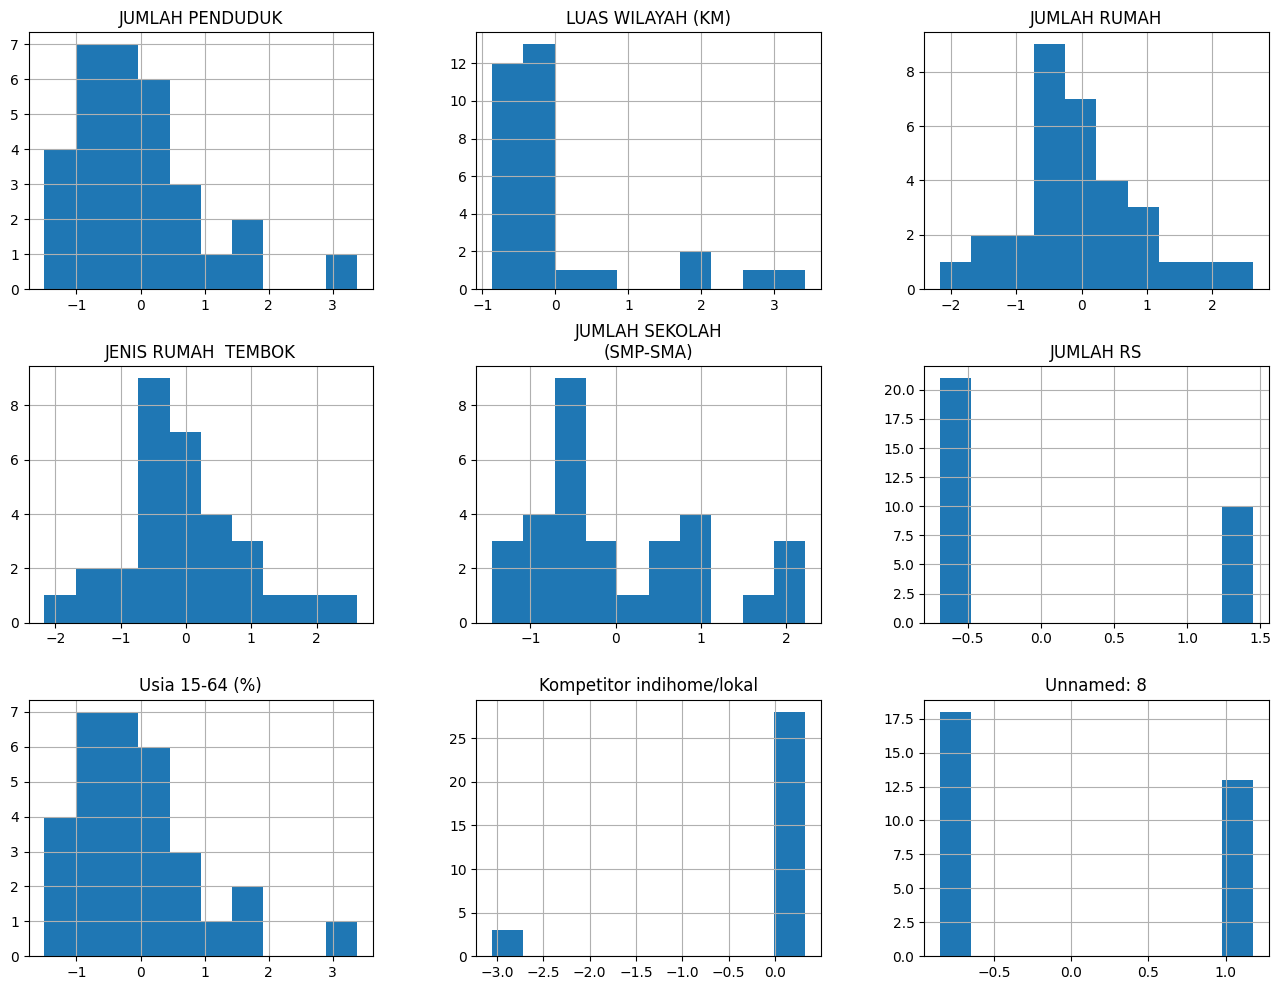

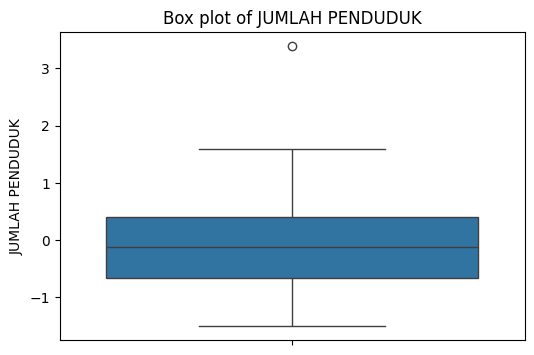

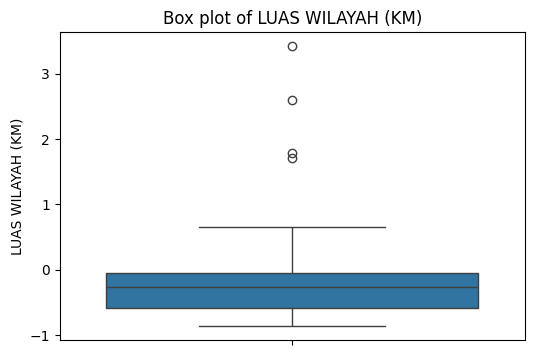

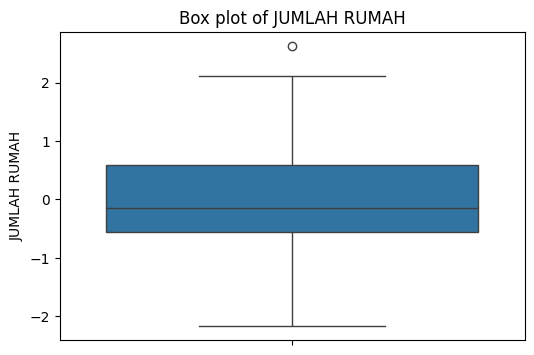

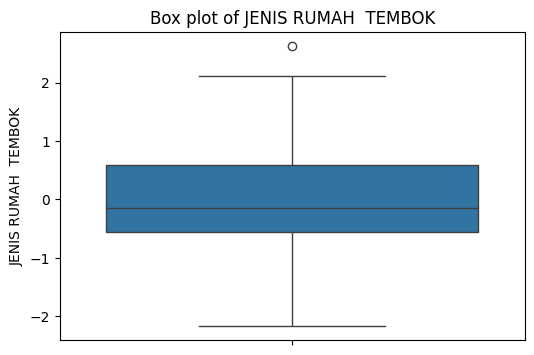

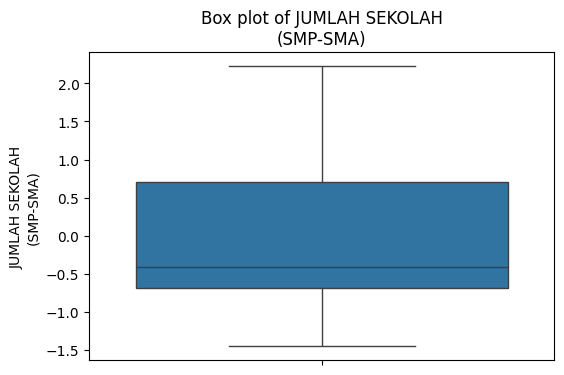

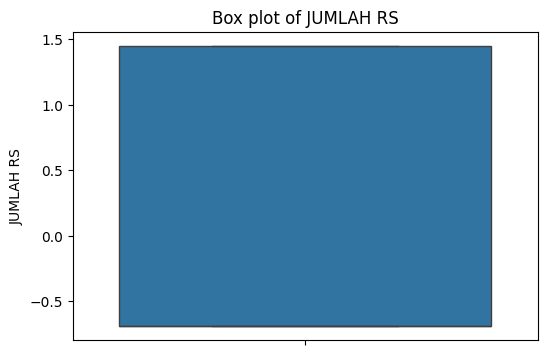

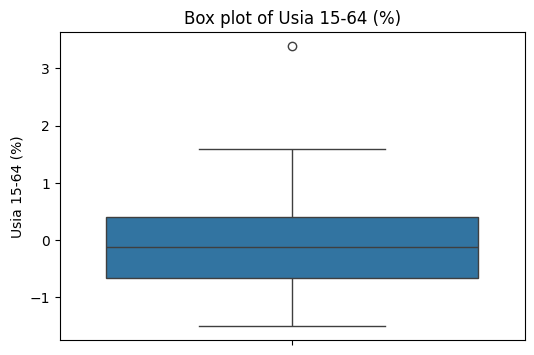

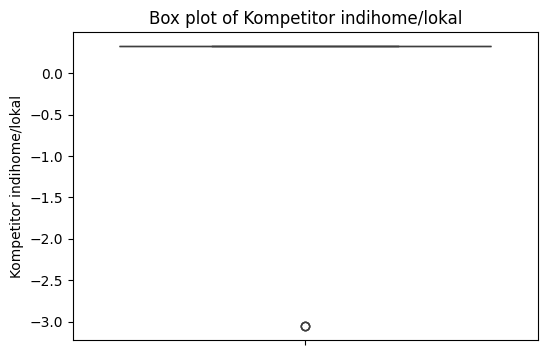

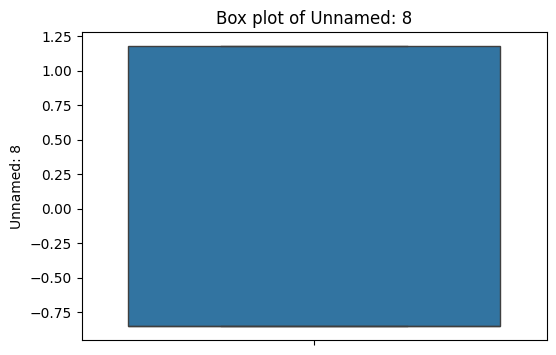

In [91]:
# prompt: lakukan EDA (univariate dan multivariate analysis, minimal 3 analisis tiap pendekatan)

# Univariate Analysis

# 1. Histograms for numerical features
df.hist(figsize=(16, 12), bins=10)
plt.show()

# 2. Box plots for numerical features to identify outliers
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# 3. Value counts for categorical features
for col in df.select_dtypes(include=['object']).columns:
    print(f'Value counts for {col}:\n{df[col].value_counts()}\n')
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Analisis Univariate
1. Distribusi Jumlah Penduduk (JUMLAH PENDUDUK)
Tujuan: Memahami distribusi jumlah penduduk di dalam dataset.
Analisis: Menggunakan histogram, kita dapat melihat sebaran jumlah penduduk. Distribusi ini dapat memberi gambaran apakah jumlah penduduk lebih banyak di rentang tertentu (misalnya di kota atau daerah yang lebih padat) atau tersebar merata.
Interpretasi: Jika histogram menunjukkan lonjakan di kisaran tertentu, ini menandakan bahwa sebagian besar daerah memiliki jumlah penduduk yang serupa. Sebaliknya, jika distribusinya merata, maka setiap daerah memiliki jumlah penduduk yang bervariasi.
2. Distribusi Luas Wilayah (LUAS WILAYAH (KM))
Tujuan: Mengetahui sebaran ukuran wilayah dalam kilometer persegi.
Analisis: Dengan histogram atau boxplot, kita dapat mengevaluasi apakah ada wilayah yang sangat luas atau kecil secara ekstrem dibandingkan wilayah lainnya. Boxplot juga berguna untuk mengidentifikasi outlier atau wilayah dengan ukuran tidak biasa.
Interpretasi: Jika ada outlier, misalnya wilayah yang jauh lebih luas dari yang lain, hal ini bisa mengindikasikan perbedaan dalam pengembangan infrastruktur atau konsentrasi penduduk.
3. Jumlah Sekolah (SMP-SMA)
Tujuan: Memahami distribusi jumlah sekolah menengah di setiap wilayah.
Analisis: Menggunakan histogram, kita bisa melihat apakah jumlah sekolah di setiap daerah bervariasi atau seragam. Ini bisa menunjukkan tingkat pembangunan pendidikan di masing-masing wilayah.
Interpretasi: Jika distribusi ini menunjukkan banyak wilayah dengan sedikit sekolah, maka mungkin ada wilayah yang kurang terlayani. Sebaliknya, distribusi yang merata menunjukkan pemerataan fasilitas pendidikan.

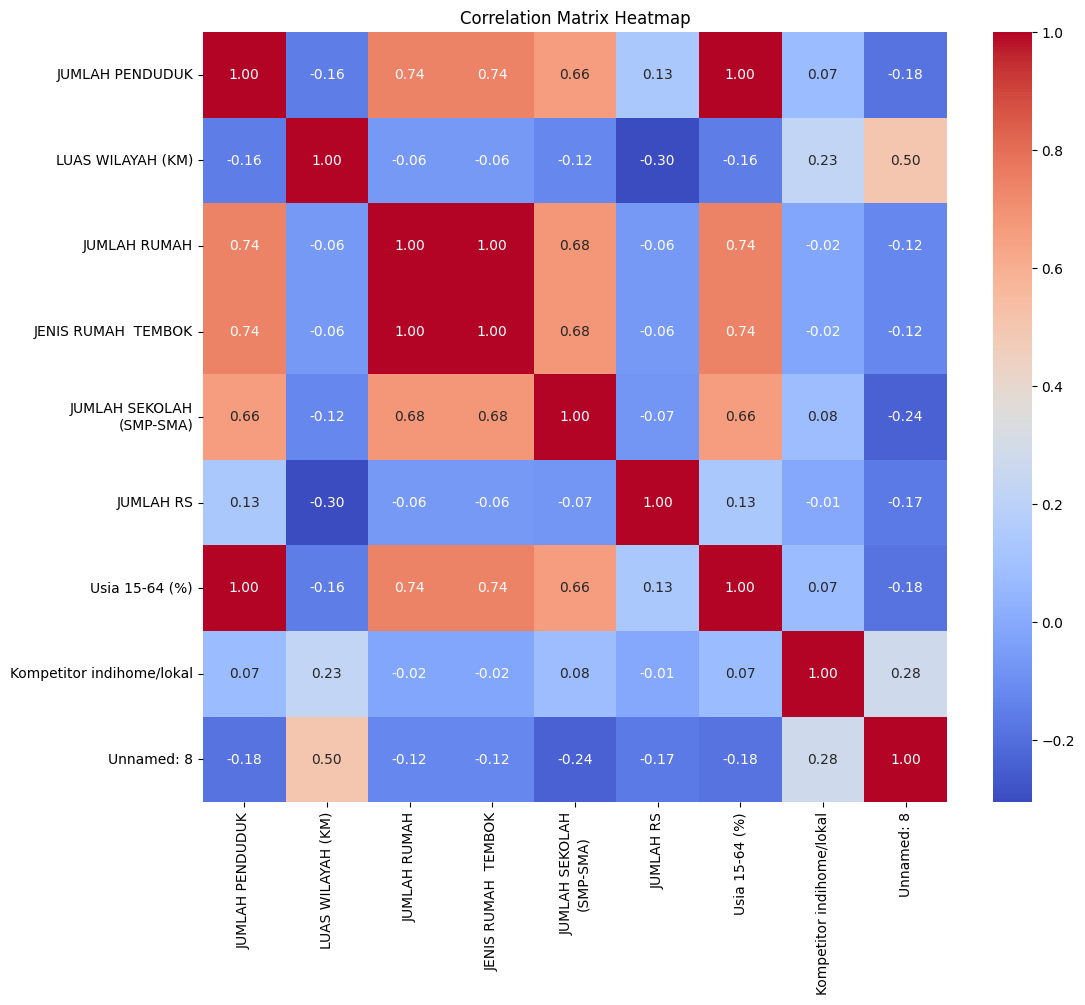

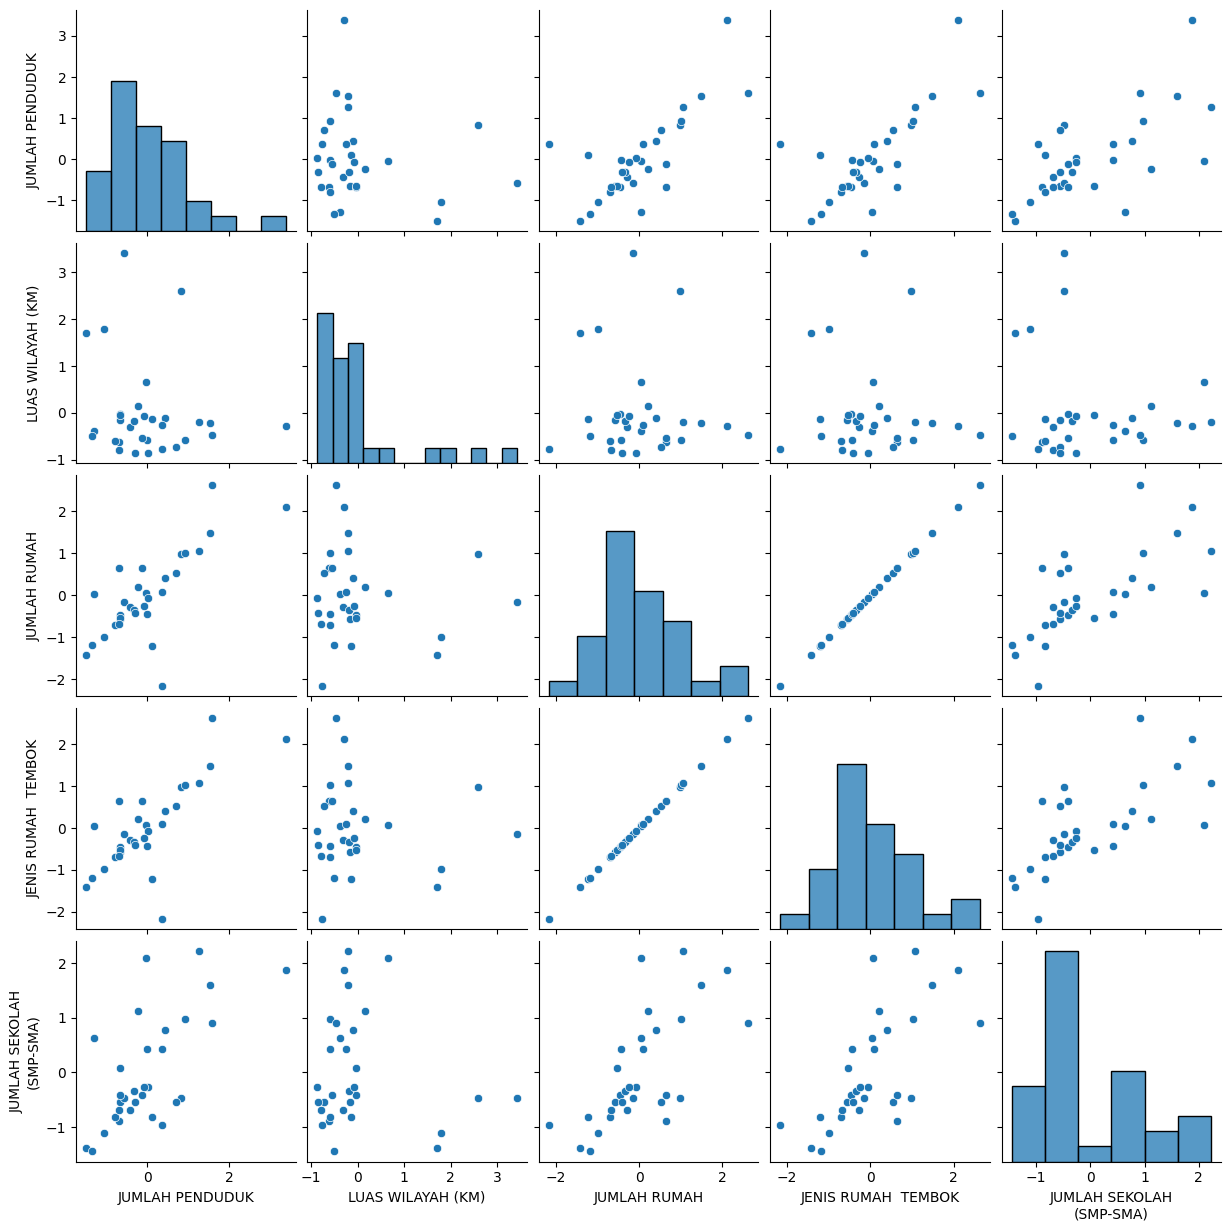

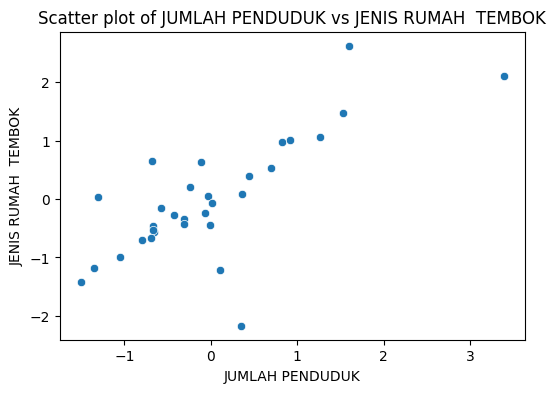

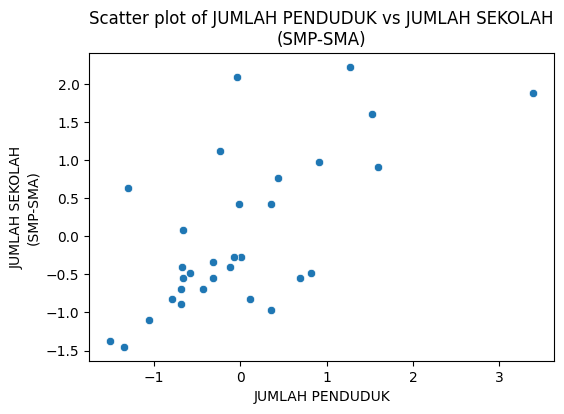

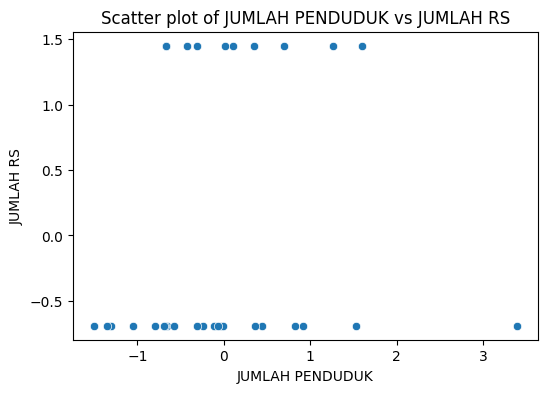

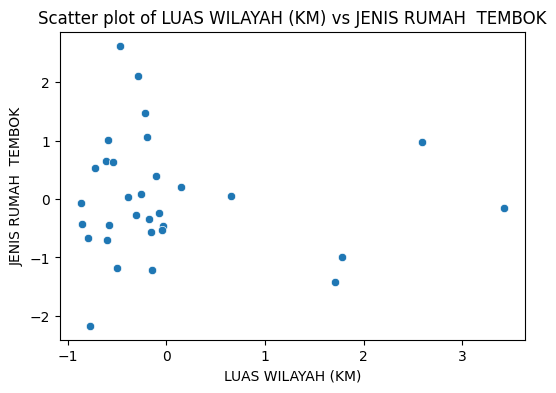

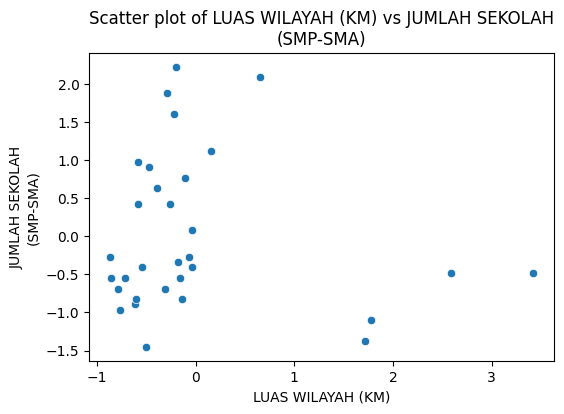

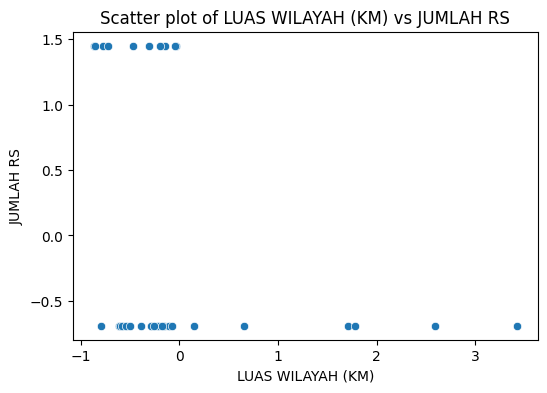

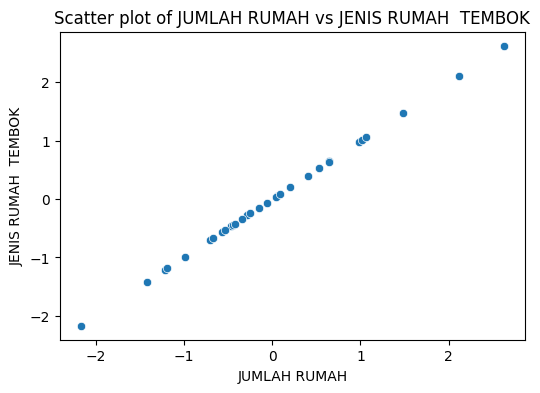

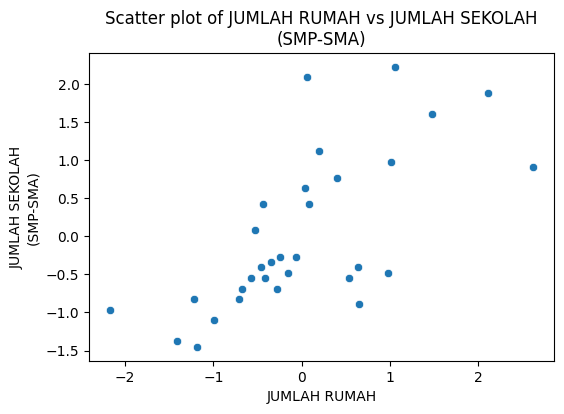

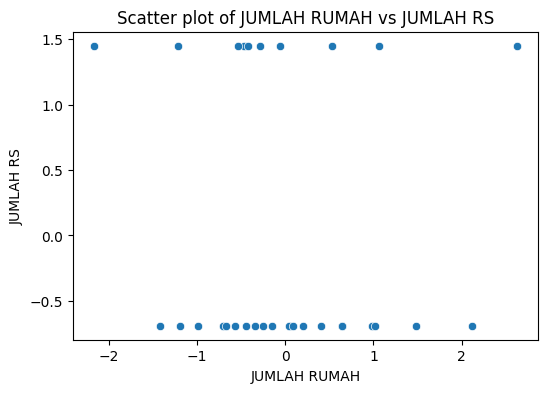

In [92]:
# Multivariate Analysis

# 1. Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# 2. Pair plots for selected numerical features
sns.pairplot(df[numerical_features[:5]]) # Pairplot for first 5 numerical features
plt.show()

# 3. Scatter plots of selected features to identify relationships
for col1 in numerical_features[:3]:
    for col2 in numerical_features[3:6]:  # Avoiding self-comparison and redundant plots
      plt.figure(figsize=(6, 4))
      sns.scatterplot(data=df, x=col1, y=col2)
      plt.title(f'Scatter plot of {col1} vs {col2}')
      plt.show()

Analisis Multivariate
1. Hubungan antara Jumlah Penduduk dengan Jumlah Sekolah (SMP-SMA)
Tujuan: Memahami apakah ada korelasi antara jumlah penduduk dengan jumlah sekolah di wilayah tersebut.
Analisis: Menggunakan scatterplot untuk memvisualisasikan hubungan antara JUMLAH PENDUDUK dan JUMLAH SEKOLAH (SMP-SMA). Scatterplot ini bisa menunjukkan apakah semakin banyak penduduk di suatu wilayah, semakin banyak pula sekolah menengah yang tersedia di sana.
Interpretasi: Jika terdapat korelasi positif yang kuat, ini berarti daerah dengan jumlah penduduk lebih besar cenderung memiliki lebih banyak sekolah menengah. Hal ini bisa mengindikasikan bahwa pemerintah atau lembaga pendidikan menyediakan fasilitas pendidikan berdasarkan kebutuhan populasi. Jika korelasi rendah, mungkin faktor lain seperti kebijakan pemerintah atau ketersediaan lahan lebih mempengaruhi jumlah sekolah.
2. Hubungan antara Jumlah Penduduk dengan Jumlah Rumah Sakit (RS)
Tujuan: Mengidentifikasi apakah wilayah dengan jumlah penduduk yang lebih tinggi memiliki lebih banyak rumah sakit.
Analisis: Gunakan scatterplot antara JUMLAH PENDUDUK dan JUMLAH RS. Selain scatterplot, kita bisa menambahkan garis tren untuk membantu mengidentifikasi pola umum.
Interpretasi: Jika ada korelasi positif, artinya semakin banyak jumlah penduduk, semakin besar kemungkinan terdapat lebih banyak rumah sakit. Korelasi kuat di sini bisa mengindikasikan bahwa fasilitas kesehatan disesuaikan dengan jumlah penduduk untuk memenuhi kebutuhan pelayanan kesehatan. Sebaliknya, jika tidak ada korelasi, berarti mungkin fasilitas kesehatan tidak selalu dibangun berdasarkan jumlah penduduk, dan ada faktor lain yang mempengaruhi kehadiran rumah sakit di suatu wilayah.
3. Hubungan antara Luas Wilayah dengan Jumlah Rumah Tembok
Tujuan: Mengetahui apakah luas wilayah mempengaruhi jumlah rumah yang dibangun dengan bahan tembok (jenis rumah permanen).
Analisis: Scatterplot antara LUAS WILAYAH (KM) dan JENIS RUMAH TEMBOK bisa memberikan gambaran mengenai sebaran jenis rumah tembok berdasarkan luas wilayah. Scatterplot ini bisa menunjukkan apakah wilayah yang lebih luas memiliki lebih banyak rumah tembok.
Interpretasi: Jika ada korelasi positif yang signifikan, maka wilayah yang lebih luas mungkin lebih memungkinkan untuk pembangunan rumah permanen (tembok) dalam jumlah besar, mungkin karena ketersediaan lahan yang cukup. Sebaliknya, jika tidak ada korelasi, maka ini bisa mengindikasikan bahwa faktor selain luas wilayah, seperti kepadatan penduduk atau kebijakan perumahan, lebih memengaruhi distribusi rumah tembok.

In [99]:
from sklearn.cluster import KMeans

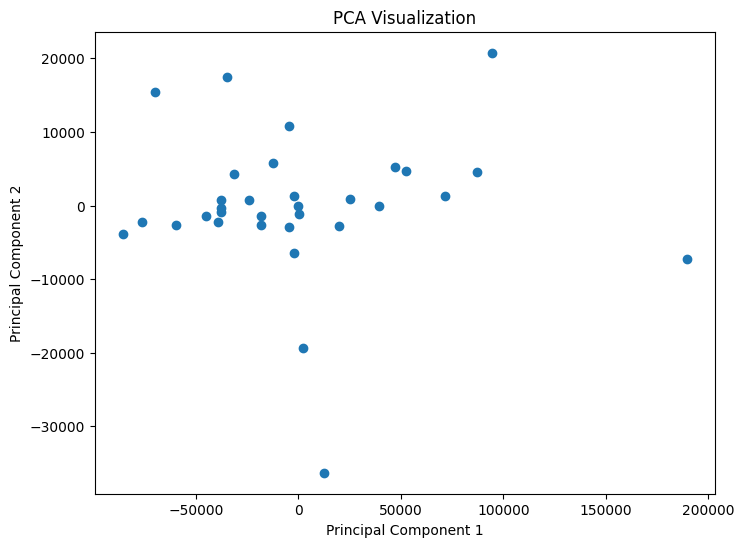

Explained variance ratio: [0.96974505 0.03025407]


In [110]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df[numerical_features]), columns=numerical_features)

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_imputed)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

# Display explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


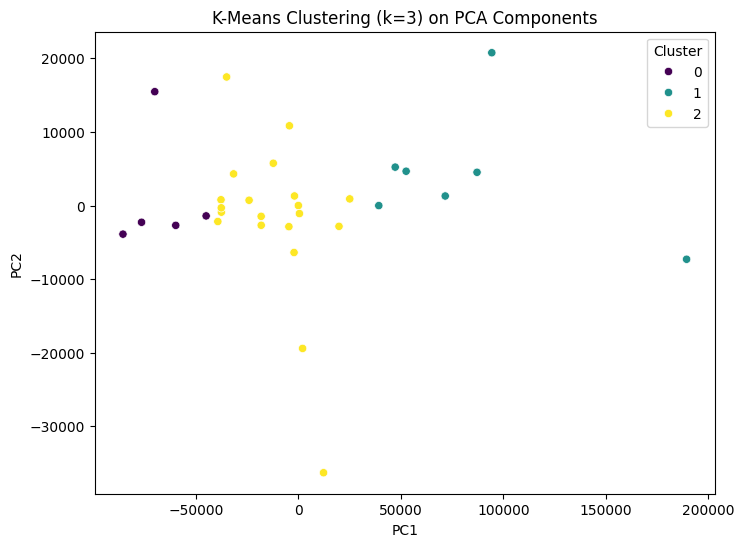

Silhouette Score: 0.431501019256083


In [111]:
# prompt: buat kmeans clustering dengan k 3

# K-Means Clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_imputed)  # Use the imputed DataFrame for clustering

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clustering (k=3) on PCA Components')
plt.show()

# Evaluate the clustering using Silhouette score
silhouette_avg = silhouette_score(df_imputed, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

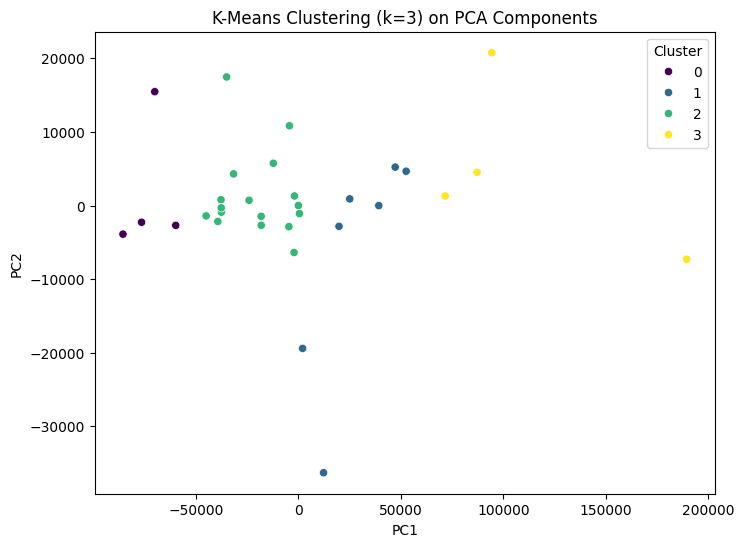

Silhouette Score: 0.4152711630350415


In [112]:
# prompt: buat kmeans clustering dengan k 3

# K-Means Clustering with k=3
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_imputed)  # Use the imputed DataFrame for clustering

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clustering (k=3) on PCA Components')
plt.show()

# Evaluate the clustering using Silhouette score
silhouette_avg = silhouette_score(df_imputed, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")